## MBA em Ciência de Dados
# Redes Neurais e Aprendizado Profundo

### <span style="color:darkred">Módulo 5 - Redes neurais para dados sequenciais</span>


### <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

As respostas devem ser dadas no Moodle, use esse notebook apenas para gerar o código necessário para obter as respostas

---

---

### Questão 1)

Considere as seguintes características de instâncias de um conjunto de treinamento:

I - Podem ser processadas de maneira independente, inclusive em qualquer permutação, sem necessidade de relação entre as instâncias  
II - Podem possuir algum nível de dependência temporal ou sequencial entre as instâncias  
III - Os valores numéricos das instâncias estão originalmente entre -1 e 1  
IV - Podem ter uma sequência de valores que precisa ser analisada em ordem específica  
V - Quaisquer dados categóricos, em vez de numéricos, podem ser observados  

Quais características estão relacionadas a dados sequenciais, utilizados tipicamente em redes neurais recorrentes e suas variantes?

(a) I, II, V<br>
**(b) II, IV**<br>
(d) II, III, V<br>
(e) II, IV, V<br>
(c) III, IV<br>


---

### Questão 2)

Qual o mecanismo que unidades recorrentes do tipo RNN clássica e GRU usam para considerar a sequência dos dados durante o aprendizado dos parâmetros do modelo?

**(a) A entrada atual $t$ é combinada com a saída da etapa anterior $t-1$ para gerar a saída na etapa $t$**<br>
(b) A saída de cada neurônio é combinada diretamente com a média das entradas anteriores e atuais para gerar a nova saída<br>
(c) A saída de cada neurônio recorrente é combinada com a saída dos neurônios nas camadas subsequentes para formar um estado compartilhado<br>
(d) Utiliza-se uma função de ativação não linear que transforma a entrada atual com base no valor da célula anterior e os pesos associados<br>
(e) As unidades recorrentes armazenam todas as entradas anteriores diretamente para realizar comparações com a entrada atual  


### Questão 3)

Quais das alternativas descreve a saída de uma camada de atenção para uma entrada com um conjunto de valores de dados sequenciais?

(a) Define quais valores, ao longo de uma sequência de dados em diferentes iterações, serão processados, e quais serão ignorados, para produzir cada saída da camada de atenção, similar a uma camada de "dropout".<br>
(b) Um vetor contendo scores entre 0 e 1 para ponderar os valores da entrada.<br>
(c) Um vetor memória acumulado ao longo das iterações de forma que um histórico de todos dados anteriores influencia na saída atual.<br>
**(d) Uma representação vetorial contextual, a qual é ponderada de acordo com a importância relativa, aprendida pela camada, entre os valores da entrada.**<br>
(e) A similaridade entre cada par de valores da entrada.<br>

---
### Questão 4)

Considere os seguintes casos de entrada e saída no contexto de redes neurais que processam dados sequenciais:

I - Entrada: texto livre de até 500 palavras contendo uma descrição de um problema técnico. Saída: classificação binária indicando se o problema pode ser resolvido remotamente ou não<br>
II - Entrada: uma série temporal com medições de temperatura de T1 até TN. Saída: predição dos valores futuros para os instantes TN+1 até TN+3<br>
III - Entrada: sequência de frames de vídeo de 10 segundos de uma câmera de vigilância. Saída: identificação de uma ação específica (como "andar" ou "sentar") no vídeo<br>
IV - Entrada: uma frase no idioma Espanhol. Saída: tradução da frase para o idioma Inglês<br>

Quais dos casos acima representam o cenário implementado por meio de Sequence-to-Sequence?

 (a) I, III<br>
 **(b) II, IV**<br>
 (c) II, III, IV<br>
 (d) IV<br>
 (e) todos os casos<br>


---

### Questão 5)

Execute um experimento para predição de valores futuros de uma série temporal. Use o código fornecido no notebook e complete para obter o resultado necessário.

A arquitetura a usar possui:    
- Camada LSTM com 32 neuronios, retornando sequencias, ativação relu
- Camada LSTM com 64 neuronios, sem retornar sequencias, ativação relu
- Camada Dropout 0.25
- Camada Densa de saída para predição univariada do próximo valor da série, ativação relu.

Treinar com batch_size=1, por 10 épocas, usando Adam e learning_rate fixo = 0.00075.

Vamos explorar o treinamento com dados usando 3 time steps diferentes [1, 3, 9]. Para cada time step, gere os conjuntos de treinamento e validação correspondentes, e execute 10 treinamentos com as mesmas configurações e a use como semente 42. Veja código inicial, e complemente com os passos necessários.

Compute o mean squared error (MSE) para cada execução no conjunto de validação. Depois, excluindo o maior e o menor valor de MSE das 10 execuções, calcule e armazene a média e desvio padrão do MSE ao longo das diferentes seeds para cada configuração de time steps. Ou seja, a média e desvio serão calculados sobre os valores obtidos nos experimentos.

OBS: devido a necesitar várias repetições o experimento completo pode demorar até 15 minutos. Use runtime GPU T4 ou TPU para maior velocidade.

Considerando 3 casas decimais, qual(is) configuração de time steps gerou a menor média, e a maior média, respectivamente? Caso haja empate use o desvio padrão para desempatar (configuração com menor desvio padrão para desempatar a menor média, e com maior desvio padrão para desempatar maior média).

(a) Menor média = 1, Maior média = 9<br>
(b) Menor média = 3, Maior média = 1<br>
(c) Menor média = 3, Maior média = 9<br>
(d) Menor média = 9, Maior média = 1<br>
(e) Menor média = 9, Maior média = 3<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf

from numpy.random import seed
from tensorflow.random import set_seed
from tensorflow.keras import layers, models, optimizers

from sklearn.metrics import mean_squared_error
from math import sqrt

import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set()

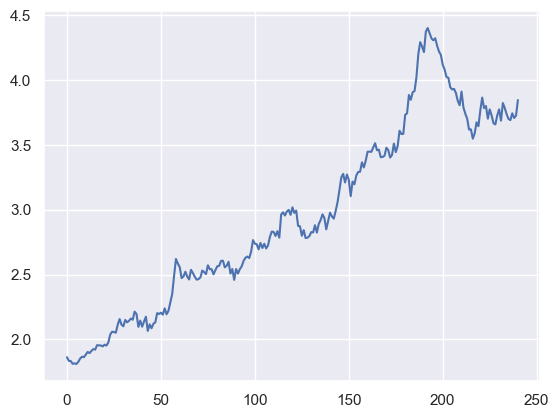

In [2]:
df = pd.read_csv(r"C:\Users\feh_s\MBA_data_science\4. Redes Neurais e Aprendizado Profundo\Aula 5\dados\price_of_ground_chuck.csv")

# pega segunda coluna do dataframe
var = df.columns.values[1]
series = np.array(df[var])
plt.plot(series)

In [3]:
# variaveis que definem divisao em treinamento e teste e controlam adição de ruído
porc_treinamento = 60
porc_validacao = 15

# calcula tamanhos dos dados de treinamento (n_train) e teste (n_test)
n_train = int(len(series)*(porc_treinamento/100.0))
n_val = int(len(series)*(porc_validacao/100.0))
n_test = len(series)-(n_train+n_val)

train_x = series[:n_train]
val_x = series[n_train-1:n_train+n_val]
test_x = series[n_train+n_val-1:]

# normalização min-max com base no treinamento
vmax = train_x.max()
vmin = train_x.min()

train_x_norm = (train_x - vmin)/(vmax - vmin)
val_x_norm = (val_x - vmin)/(vmax - vmin)
test_x_norm = (test_x - vmin)/(vmax - vmin)

print("Exemplos de Treinamento: ", n_train)
print("Exemplos de Validacao: ", n_val)
print("Exemplos de Teste: ", n_test)

Exemplos de Treinamento:  144
Exemplos de Validacao:  36
Exemplos de Teste:  61


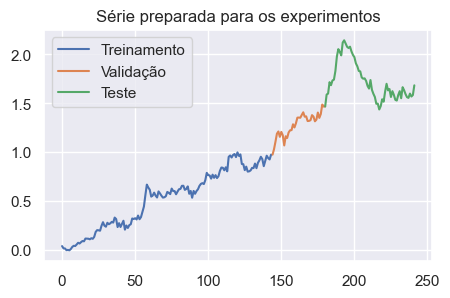

In [4]:
fig = plt.figure(figsize=(5,3))
plt.plot(np.arange(0, n_train), train_x_norm, label='Treinamento')
plt.plot(np.arange(n_train, n_train+n_val+1), val_x_norm, label='Validação')
plt.plot(np.arange(n_train+n_val, n_train+n_val+n_test+1), test_x_norm, label='Teste')
plt.title('Série preparada para os experimentos')
plt.legend()


In [5]:
# formato deve ser [samples, time steps, features]
def recurrent_array(train_x, time_steps=1):

    array = np.array(np.reshape(train_x, (-1, 1)), copy=True)

    train_y_ts = array[time_steps:]
    train_x_ts = []
    for i in range(0, len(array) - time_steps):
        train_x_ts.append(array[i:i+time_steps])

    train_x_ts = np.array(train_x_ts)

    #rec_array = np.reshape(array, (array.shape[0], time_steps, array.shape[1]))
    return train_x_ts, train_y_ts

In [6]:
def model_LSTM(time_steps):
    batch_size = 1
    seed(1)
    set_seed(1)
    no_features = recurrent_array(train_x=train_x_norm, time_steps=1)[1].shape[1]

    modelLSTM = models.Sequential()
    modelLSTM.add(layers.InputLayer((None, no_features)))
    modelLSTM.add(layers.LSTM(16, return_sequences=True, activation='relu'))
    modelLSTM.add(layers.LSTM(64, return_sequences=False, activation='relu'))
    modelLSTM.add(layers.Dropout(0.25))
    modelLSTM.add(layers.Dense(1, activation='relu'))
    modelLSTM.summary()

    return modelLSTM

In [7]:
recurrent_array(train_x=train_x_norm, time_steps=1)[1].shape

(143, 1)

In [8]:
train_x_rec, train_y_rec = recurrent_array(train_x_norm, time_steps=1)

In [9]:
# epochs = 10

# # compilacao e treinamento
# modelLSTM.compile(loss='mean_squared_error',
#             optimizer=keras.optimizers.Adam(learning_rate=0.00075),
#             metrics=['mae'])

# histLSTM = modelLSTM.fit(train_x_rec, train_y_rec,
#                   batch_size=batch_size, epochs=epochs,
#                   callbacks=[callbacklr], shuffle=False,
#                   verbose=0)

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

n_exp = 10
time_steps_expr = [1, 3, 9]
print(50*'=')

mse_means = []
mse_stds = []

for time_steps in time_steps_expr:
    print(f'Time step = {time_steps}:')

    mse_values = []
    

    for i in range(n_exp):
        seed(42)
        set_seed(42)

        model = model_LSTM(time_steps)
        train_y_predL = model.predict(train_x_rec)
        train_y_predL = np.reshape(train_y_predL, (-1, 1))[time_steps:]

        test_y_predL = model.predict(test_x_norm)
        test_y_predL = np.reshape(test_y_predL, (-1, 1))[time_steps:]

        # Aqui você deve inserir o código para treinar o modelo e fazer previsões no conjunto de validação
        # Por exemplo:
        # model.fit(...)
        # predictions = model.predict(validation_data)

        # Calcular o MSE
        mse = mean_squared_error(val_x_norm, test_y_predL)
        mse_values.append(mse)
    
    # Exclui o maior e o menor valor de MSE
    mse_values_sorted = sorted(mse_values)
    mse_values_sorted = mse_values_sorted[1:-1]

    # Calcula a média e o desvio padrão do MSE
    mse_mean = np.mean(mse_values_sorted)
    mse_std = np.std(mse_values_sorted)
    
    mse_means.append(mse_mean)
    mse_stds.append(mse_std)
    
    print(f'Média do MSE: {mse_mean:.4f}')
    print(f'Desvio padrão do MSE: {mse_std:.4f}')

# Gráfico da média e desvio padrão do MSE para diferentes time steps
plt.figure(figsize=(8, 6))
plt.errorbar(time_steps_expr, mse_means, yerr=mse_stds, fmt='-o', capsize=5)
plt.xlabel('Time Steps')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Média e Desvio Padrão do MSE para Diferentes Time Steps')
plt.grid(True)
plt.show()


Time step = 1:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.random import set_seed

n_exp = 10
time_steps_expr = [1, 3, 9]
print(50*'=')

mse_means = []
mse_stds = []

for time_steps in time_steps_expr:
    print(f'Time step = {time_steps}:')

    mse_values = []
    
    for i in range(n_exp):
        seed(42)
        set_seed(42)

        model = model_LSTM(time_steps)
        
        # Verifique se train_x_rec e test_x_norm têm as formas esperadas
        print(f"Forma de train_x_rec antes da predição: {train_x_rec.shape}")
        print(f"Forma de test_x_norm antes da predição: {test_x_norm.shape}")
        
        # Realize a previsão no conjunto de teste
        test_y_predL = model.predict(test_x_norm)

        # Certifique-se de que val_x_norm e test_y_predL têm a mesma forma
        print(f"Forma de val_x_norm: {val_x_norm.shape}")
        print(f"Forma de test_y_predL: {test_y_predL.shape}")

        
        # Calcular o MSE
        mse = mean_squared_error(val_x_norm, test_y_predL)
        mse_values.append(mse)
    
    # Exclui o maior e o menor valor de MSE
    mse_values_sorted = sorted(mse_values)
    mse_values_sorted = mse_values_sorted[1:-1]

    # Calcula a média e o desvio padrão do MSE
    mse_mean = np.mean(mse_values_sorted)
    mse_std = np.std(mse_values_sorted)
    
    mse_means.append(mse_mean)
    mse_stds.append(mse_std)
    
    print(f'Média do MSE: {mse_mean:.4f}')
    print(f'Desvio padrão do MSE: {mse_std:.4f}')

# Gráfico da média e desvio padrão do MSE para diferentes time steps
plt.figure(figsize=(8, 6))
plt.errorbar(time_steps_expr, mse_means, yerr=mse_stds, fmt='-o', capsize=5)
plt.xlabel('Time Steps')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Média e Desvio Padrão do MSE para Diferentes Time Steps')
plt.grid(True)
plt.show()


Time step = 1:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Forma de train_x_rec antes da predição: (143, 1, 1)
Forma de test_x_norm antes da predição: (62,)


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32,), dtype=float32). Expected shape (None, None, 1), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=float32)
  • training=False
  • mask=None

In [38]:

n_exp = 10
time_steps_expr = [1, 3, 9]
print(50*'=')

for time_steps in time_steps_expr:

    print(f'Time step = {time_steps}:')


    for i in range(n_exp):
        seed(42)
        set_seed(42)

        model = model_LSTM(time_steps)



Time step = 1:


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_60 (LSTM)                  │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_61 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_62 (LSTM)                  │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_63 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_64 (LSTM)                  │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_65 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_66 (LSTM)                  │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_67 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_68 (LSTM)                  │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_69 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_70 (LSTM)                  │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_71 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_72 (LSTM)                  │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_73 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_74 (LSTM)                  │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_75 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_76 (LSTM)                  │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_77 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_78 (LSTM)                  │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_79 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Time step = 3:


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_80 (LSTM)                  │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_81 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_82 (LSTM)                  │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_83 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_84 (LSTM)                  │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_85 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_86 (LSTM)                  │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_87 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_88 (LSTM)                  │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_89 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_90 (LSTM)                  │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_91 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_92 (LSTM)                  │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_93 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_94 (LSTM)                  │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_95 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_96 (LSTM)                  │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_97 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_98 (LSTM)                  │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_99 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Time step = 9:


Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_100 (LSTM)                 │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_101 (LSTM)                 │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_102 (LSTM)                 │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_103 (LSTM)                 │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_104 (LSTM)                 │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_105 (LSTM)                 │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_106 (LSTM)                 │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_107 (LSTM)                 │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_108 (LSTM)                 │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_109 (LSTM)                 │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_110 (LSTM)                 │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_111 (LSTM)                 │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_112 (LSTM)                 │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_113 (LSTM)                 │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_114 (LSTM)                 │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_115 (LSTM)                 │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_116 (LSTM)                 │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_117 (LSTM)                 │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_118 (LSTM)                 │ (None, None, 16)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_119 (LSTM)                 │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)